In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# talon read annot
annot = pd.read_csv('../data_processing/GM12878_talon_read_annot.tsv', sep='\t')

In [26]:
# de genes between Illumina and PacBio

# sanity check!
de = pd.read_csv('plots/edgeR_PacBio_illumina_gene_counts.tsv', sep='\t')
de = de.loc[de.status == 'significant']
print(len(de.loc[de.logFC.abs() > 1].index))
print(len(de.loc[de.adj_pval < 0.01].index))

de = pd.read_csv('plots/edgeR_PacBio_illumina_gene_counts.tsv', sep='\t')

1871
1871


In [43]:
df = annot.merge(de, how='left', left_on='annot_gene_id', right_on='gene_id')
print(df.tail())

                                    read_name         dataset genome_build  \
7324514  c2185600-2a1b-46f7-b581-17d13caa4e84  ONT_GM12878_R1    hg38_SIRV   
7324515  b4e8fb44-5130-4b8a-86fa-0a5b05520e11  ONT_GM12878_R1    hg38_SIRV   
7324516  3e562d19-20a9-4abf-add7-3e905f4d542e  ONT_GM12878_R2    hg38_SIRV   
7324517  3c21d2e1-fa5a-4434-93d4-200ad2a72ffb  ONT_GM12878_R2    hg38_SIRV   
7324518  3ac18de3-0e87-4c27-8f89-ce64e5b7d966  ONT_GM12878_R1    hg38_SIRV   

         chrom  read_start   read_end strand  n_exons  read_length  gene_ID  \
7324514  chr12   133205612  133206912      +        1         1265    36736   
7324515  chr12   133205626  133206082      +        1          435    36736   
7324516  chr12   133206037  133206904      +        1          846    36736   
7324517  chr12   133206343  133206914      +        1          572    36736   
7324518  chr12   133209208  133211186      +        1         1979    36736   

         ...   status illumina_counts_1 illumina_counts_

In [56]:
def get_talon_nov_colors():
    c_dict = {'Known': '#009E73',
              'ISM': '#0072B2',
              'NIC': '#D55E00',
              'NNC': '#E69F00',
              'Antisense': '#000000',
              'Intergenic': '#CC79A7',
              'Genomic': '#F0E442'}
    order = ['Known', 'ISM', 'NIC', 'NNC', 'Antisense', 'Intergenic', 'Genomic']
    
    return c_dict, order

def plot_read_novelty(df, opref, c_dict, order,
                      ylim=None, title=None, 
                      datasets='all'):
    sns.set_context("paper", font_scale=1.6)
    
    temp = df.copy(deep=True)
    
    # filter on datasets
    if datasets != 'all':
        temp = temp.loc[temp.dataset.isin(datasets)]        
    
    # count number of reads per cat
    temp = temp[['transcript_novelty', 'read_name']].groupby(['transcript_novelty']).count()
    temp.reset_index(inplace=True)
    temp.rename({'read_name':'counts'}, axis=1, inplace=True)
    print(temp)
    
    # actual plotting
    g = sns.catplot(data=temp, x='transcript_novelty',
                y='counts', kind='bar', 
                palette=c_dict, order=order)
    [plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
    g.set_ylabels('Reads')
    g.set_xlabels('Transcript novelty')
    
    # add percentage labels
    ax = g.axes[0,0]
    add_perc(ax, temp, 'counts')
    
    if ylim:
        g.set(ylim=(0,ylim))
    
    # add title
    if not title:
        g.fig.suptitle('Reads per novelty category')
    else:
        g.fig.suptitle('{} reads per novelty category'.format(title))
        
    # save figure
    fname = '{}_read_novelty'.format(opref)
    g.savefig(fname+'.pdf', dpi=300)
    
def add_perc(ax, data, feature):
    total = data[feature].sum()
    ylim = ax.get_ylim()[1]
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.45
        y = p.get_y() + p.get_height() + ylim*0.00625
        ax.annotate(percentage, (x, y), size = 12)

  transcript_novelty  counts
0            Genomic   27437
1                ISM   65001
2              Known  508316
3                NIC   28975
4                NNC   22310


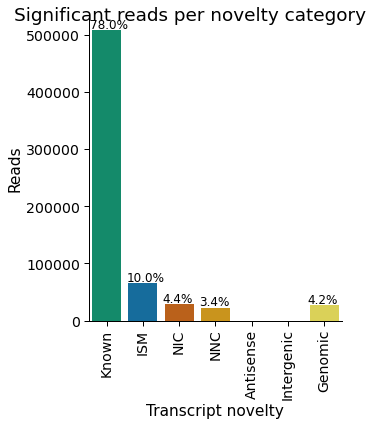

In [60]:
temp = df.loc[df.status == 'significant']
c_dict, order = get_talon_nov_colors()
opref = 'plots/sig_gene'
plot_read_novelty(temp, opref, c_dict, order,
                      title='Significant', datasets=['PB_GM12878_R1', 'PB_GM12878_R2'])

  transcript_novelty   counts
0            Genomic    96305
1                ISM   412782
2              Known  2754719
3                NIC   155959
4                NNC    89707


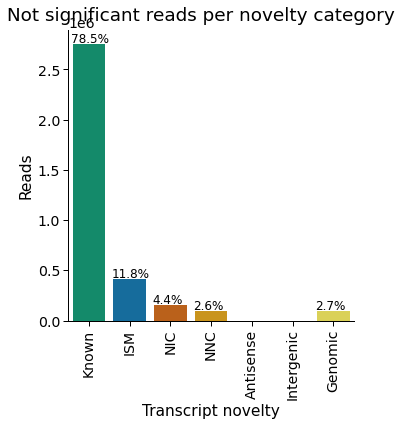

In [61]:
temp = df.loc[df.status == 'not_sig']
c_dict, order = get_talon_nov_colors()
opref = 'plots/not_sig_gene'
plot_read_novelty(temp, opref, c_dict, order,
                      title='Not significant', datasets=['PB_GM12878_R1', 'PB_GM12878_R2'])